In [2]:
!pip install efficientnet

     |████████████████████████████████| 51kB 4.6MB/s 


In [3]:
%cd '/content/drive/My Drive/BADS/7203 Image & Video/project/'

/content/drive/My Drive/BADS/7203 Image & Video/project


In [4]:
!ls model

model_efficientnetb0_v1  model_efficientnetb0_v3
model_efficientnetb0_v2  model-flickr-style_v3.h5


In [5]:
import tensorflow as tf

from keras.models import load_model
from keras import Model

import efficientnet.keras as efn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [6]:
MODEL_PATH = 'model/model-flickr-style_v3.h5'

input_shape = (224,224)

class_names = ['Bokeh','Bright','Depth_of_field',
               'Detailed','Ethereal','Geometric_composition', 
               'Hazy', 'Hdr', 'Horror', 'Long_exposure', 'Macro', 
               'Melancholy', 'Minimal', 'Noir', 
               'Pastel', 'Romantic', 'Serene', 
               'Sunny', 'Texture','Vintage']

model = load_model(MODEL_PATH)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, None, None, 3 128         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, None, None, 3 0           stem_bn[0][0]                    
______________________________________________________________________________________________

## Single image prediction

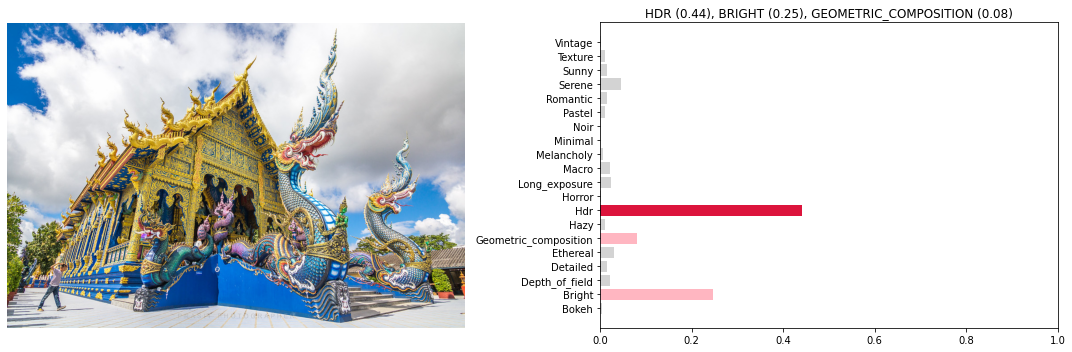

In [7]:
img_path = 'batch/thaiart/thaiart_3.jpg'
src = tf.keras.preprocessing.image.load_img(img_path)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=input_shape)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)

plt.figure(figsize=(15,5), tight_layout=True)
plt.subplot(1,2,1)
plt.imshow(src)
plt.axis('off')
plt.subplot(1,2,2)

top3 = sorted(zip(class_names, predictions[0]), key=lambda x: x[1], reverse=True)[:3]
l,p = zip(*top3)
plt.barh(class_names, predictions[0], color='lightgray')
plt.barh(l[0], p[0], color='crimson')  # limegreen
plt.barh(l[1:3], p[1:3], color='lightpink') # palegreen
# plt.barh(class_names[np.argmax([0])], max(predictions[0]), color='firebrick')
result_text = ', '.join([ f"{l.upper()} ({p:.2f})" for l,p in top3])
plt.xlim(0,1)
plt.title(result_text)

plt.show()

## Batch Prediction

In [67]:
import glob

TAG = 'karuizawa'
BATCH_PATH = f"batch/{TAG}/*.jpg"
input_shape = (224,224)

filelist = glob.glob(BATCH_PATH)

# images = []
batch = np.empty((len(filelist), 224, 224, 3))

for i,file in enumerate(filelist):
    # img = tf.keras.preprocessing.image.load_img(file)
    # images.append(img) # save original image
    img = tf.keras.preprocessing.image.load_img(file, target_size=input_shape)
    batch[i,:] = img

# model serving
predictions = model.predict(batch)

df = pd.DataFrame(predictions, columns=class_names)
df['filename'] = filelist
df = df[['filename'] + class_names]
df['filename'] = df['filename'].apply(lambda x: x.split('/')[-1])
df.to_csv(f"batch_{TAG}.csv", index=False)
print(df.shape)


(25, 21)


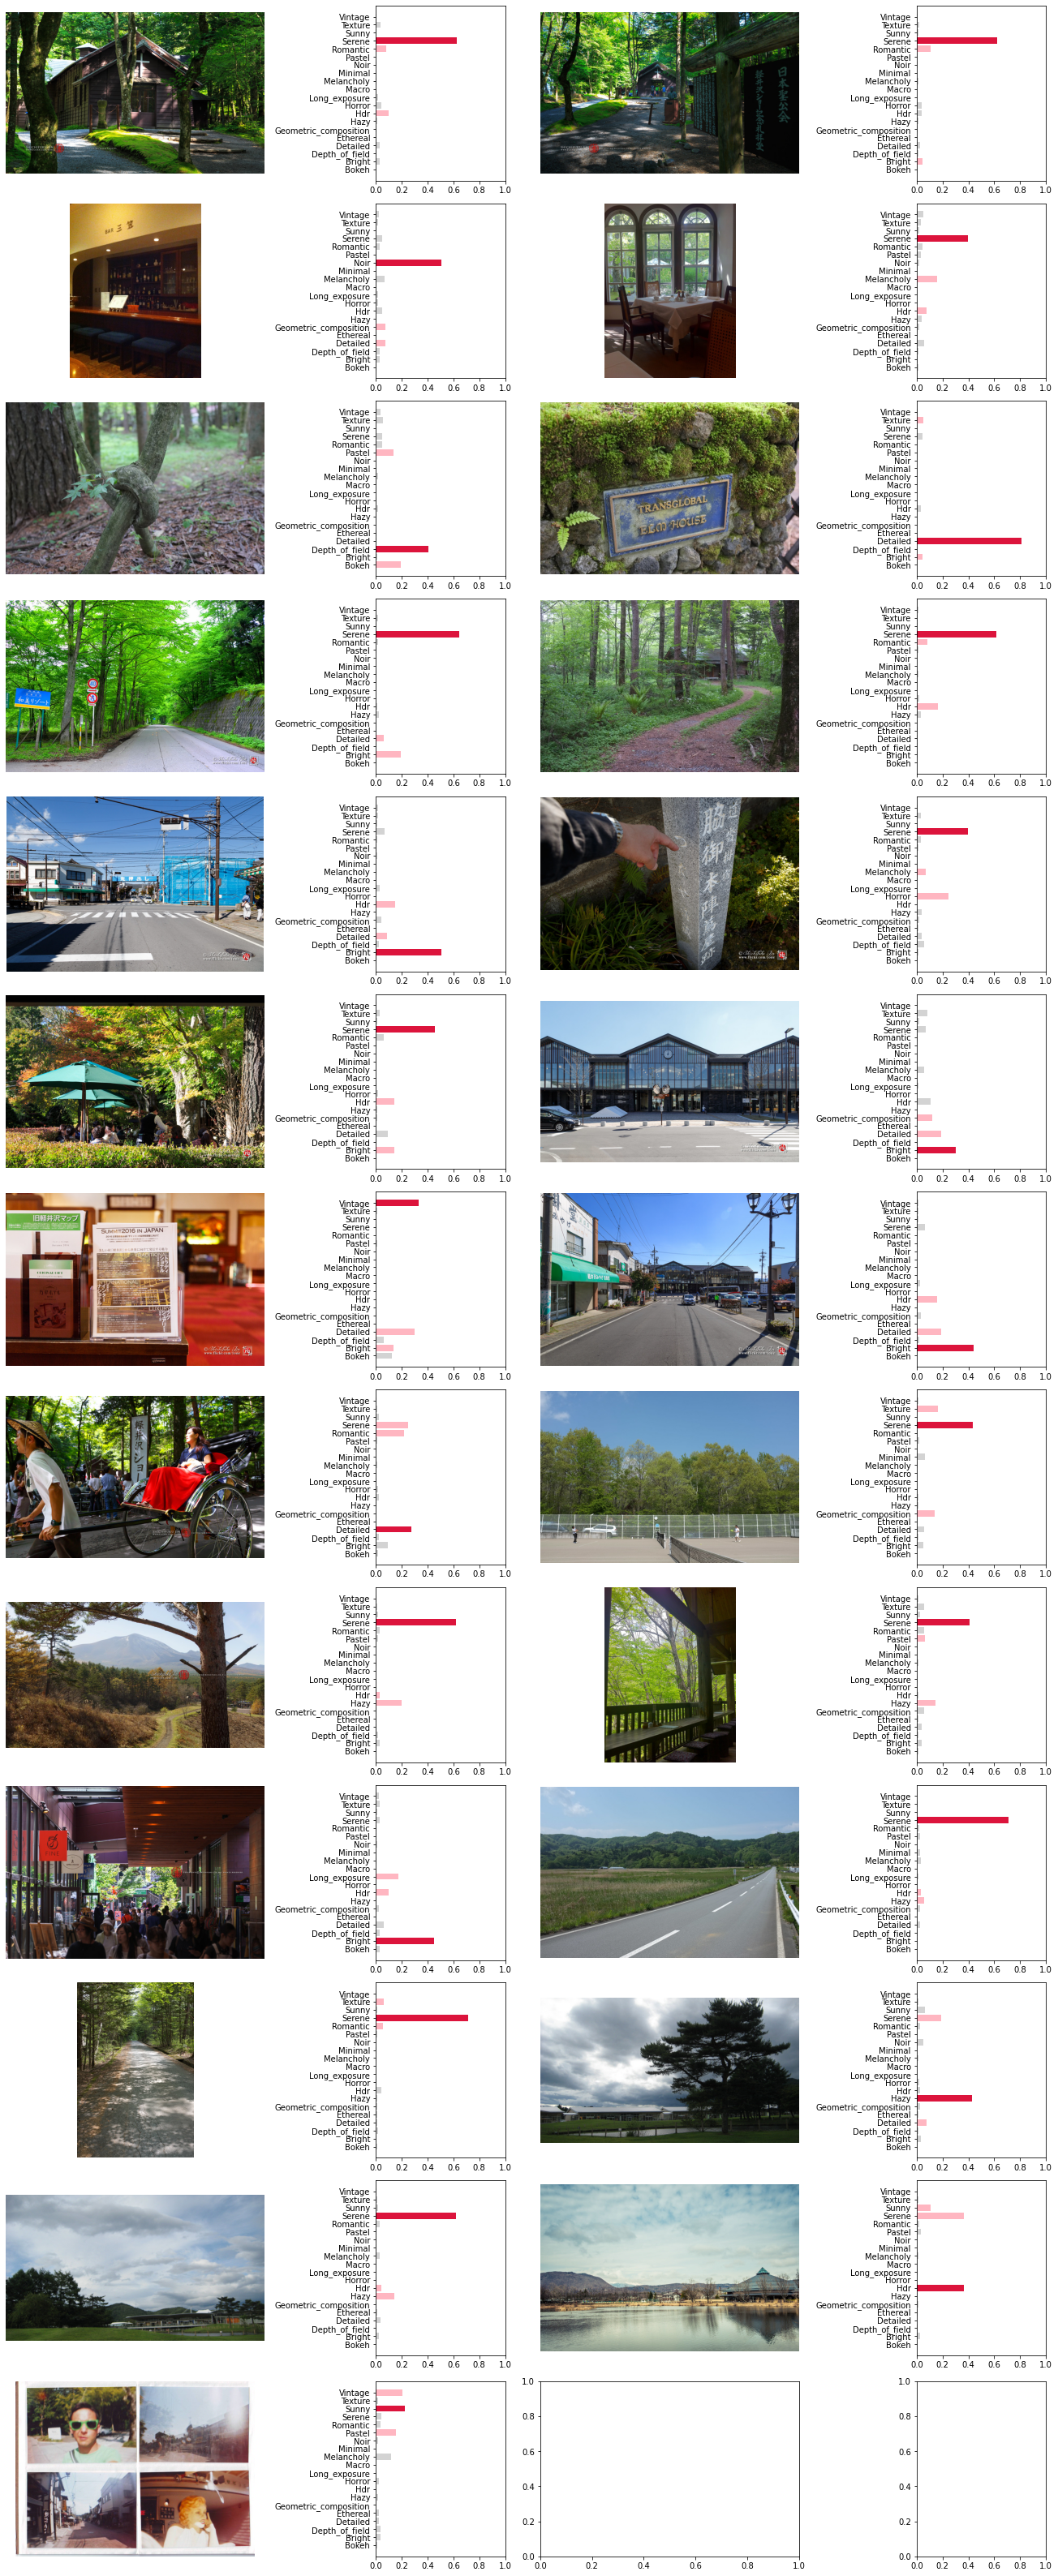

filename     Bokeh    Bright  ...     Sunny   Texture   Vintage
0   karuizawa_25.jpg  0.001793  0.027540  ...  0.005295  0.038767  0.002249
1   karuizawa_24.jpg  0.009241  0.043766  ...  0.013116  0.021339  0.006831
2   karuizawa_23.jpg  0.005701  0.033064  ...  0.002374  0.016549  0.022777
3   karuizawa_21.jpg  0.014673  0.007719  ...  0.020817  0.034961  0.052556
4   karuizawa_20.jpg  0.193307  0.012099  ...  0.001989  0.057583  0.038898
5   karuizawa_22.jpg  0.001101  0.042494  ...  0.000092  0.053722  0.004261
6   karuizawa_19.jpg  0.006369  0.195865  ...  0.005224  0.017281  0.001404
7   karuizawa_17.jpg  0.001560  0.005968  ...  0.005181  0.007329  0.011478
8   karuizawa_18.jpg  0.004281  0.504659  ...  0.010502  0.018908  0.018627
9   karuizawa_16.jpg  0.004855  0.015406  ...  0.001179  0.033928  0.009042
10  karuizawa_14.jpg  0.001843  0.142023  ...  0.008808  0.030740  0.002838
11  karuizawa_13.jpg  0.001327  0.299092  ...  0.017827  0.082199  0.008275
12  karuizawa_15.jpg  0.125201  0.137712  ...  0.000019  0.013592  0.332138
13  karuizawa_12.jpg  0.003986  0.437817  ...  0.013481  0.012552  0.010667
14  karuizawa_11.jpg  0.019703  0.094392  ...  0.023848  0.013793  0.006647
15  karuizawa_10.jpg  0.001636  0.050757  ...  0.001487  0.162398  0.014456
16   karuizawa_7.jpg  0.001463  0.029513  ...  0.017979  0.011534  0.002869
17   karuizawa_8.jpg  0.012783  0.037903  ...  0.025338  0.055522  0.010604
18   karuizawa_6.jpg  0.027510  0.453546  ...  0.013005  0.029404  0.026452
19   karuizawa_5.jpg  0.000590  0.008211  ...  0.004062  0.007096  0.001952
20   karuizawa_9.jpg  0.013352  0.005831  ...  0.013406  0.063561  0.004049
21   karuizawa_4.jpg  0.001071  0.035386  ...  0.064267  0.012063  0.004626
22   karuizawa_3.jpg  0.000379  0.020964  ...  0.017323  0.009779  0.002940
23   karuizawa_2.jpg  0.001148  0.025136  ...  0.110679  0.011646  0.008917
24   karuizawa_1.jpg  0.011197  0.035678  ...  0.222413  0.018750  0.205494

[25 rows x 21 columns]

In [68]:
items_per_row = 2
ncols = 2 * items_per_row
nrows = len(filelist)//items_per_row + (len(filelist)%items_per_row > 0)

fig, axes = plt.subplots(nrows,ncols, figsize=(18,44), 
                         gridspec_kw={'width_ratios': [2, 1, 2, 1]},
                        #  tight_layout=True,
                         constrained_layout=True
                         )

for i, file in enumerate(filelist):
    row = i // items_per_row
    col = (i % items_per_row) * 2
    
    top3 = sorted(zip(class_names, predictions[i]), key=lambda x: x[1], reverse=True)[:3]
    l,p = zip(*top3)
    # result_text = '\n'.join([ f"{l.upper()} ({p:.2f})" for l,p in top3])

    ax1 = axes[row, col]
    ax2 = axes[row, col+1]
     
    src = tf.keras.preprocessing.image.load_img(file)
    ax1.imshow(src)
    # ax1.set_title(result_text)
    ax1.axis('off')

    ax2.barh(class_names, predictions[i], color='lightgray')
    ax2.barh(l[0], p[0], color='crimson')  # limegreen
    ax2.barh(l[1:3], p[1:3], color='lightpink') # palegreen
    ax2.set_xlim(0,1)
    
    # ax2.set_title(result_text)
plt.savefig(f"batch_{TAG}.png", dpi=150)
plt.show()
df

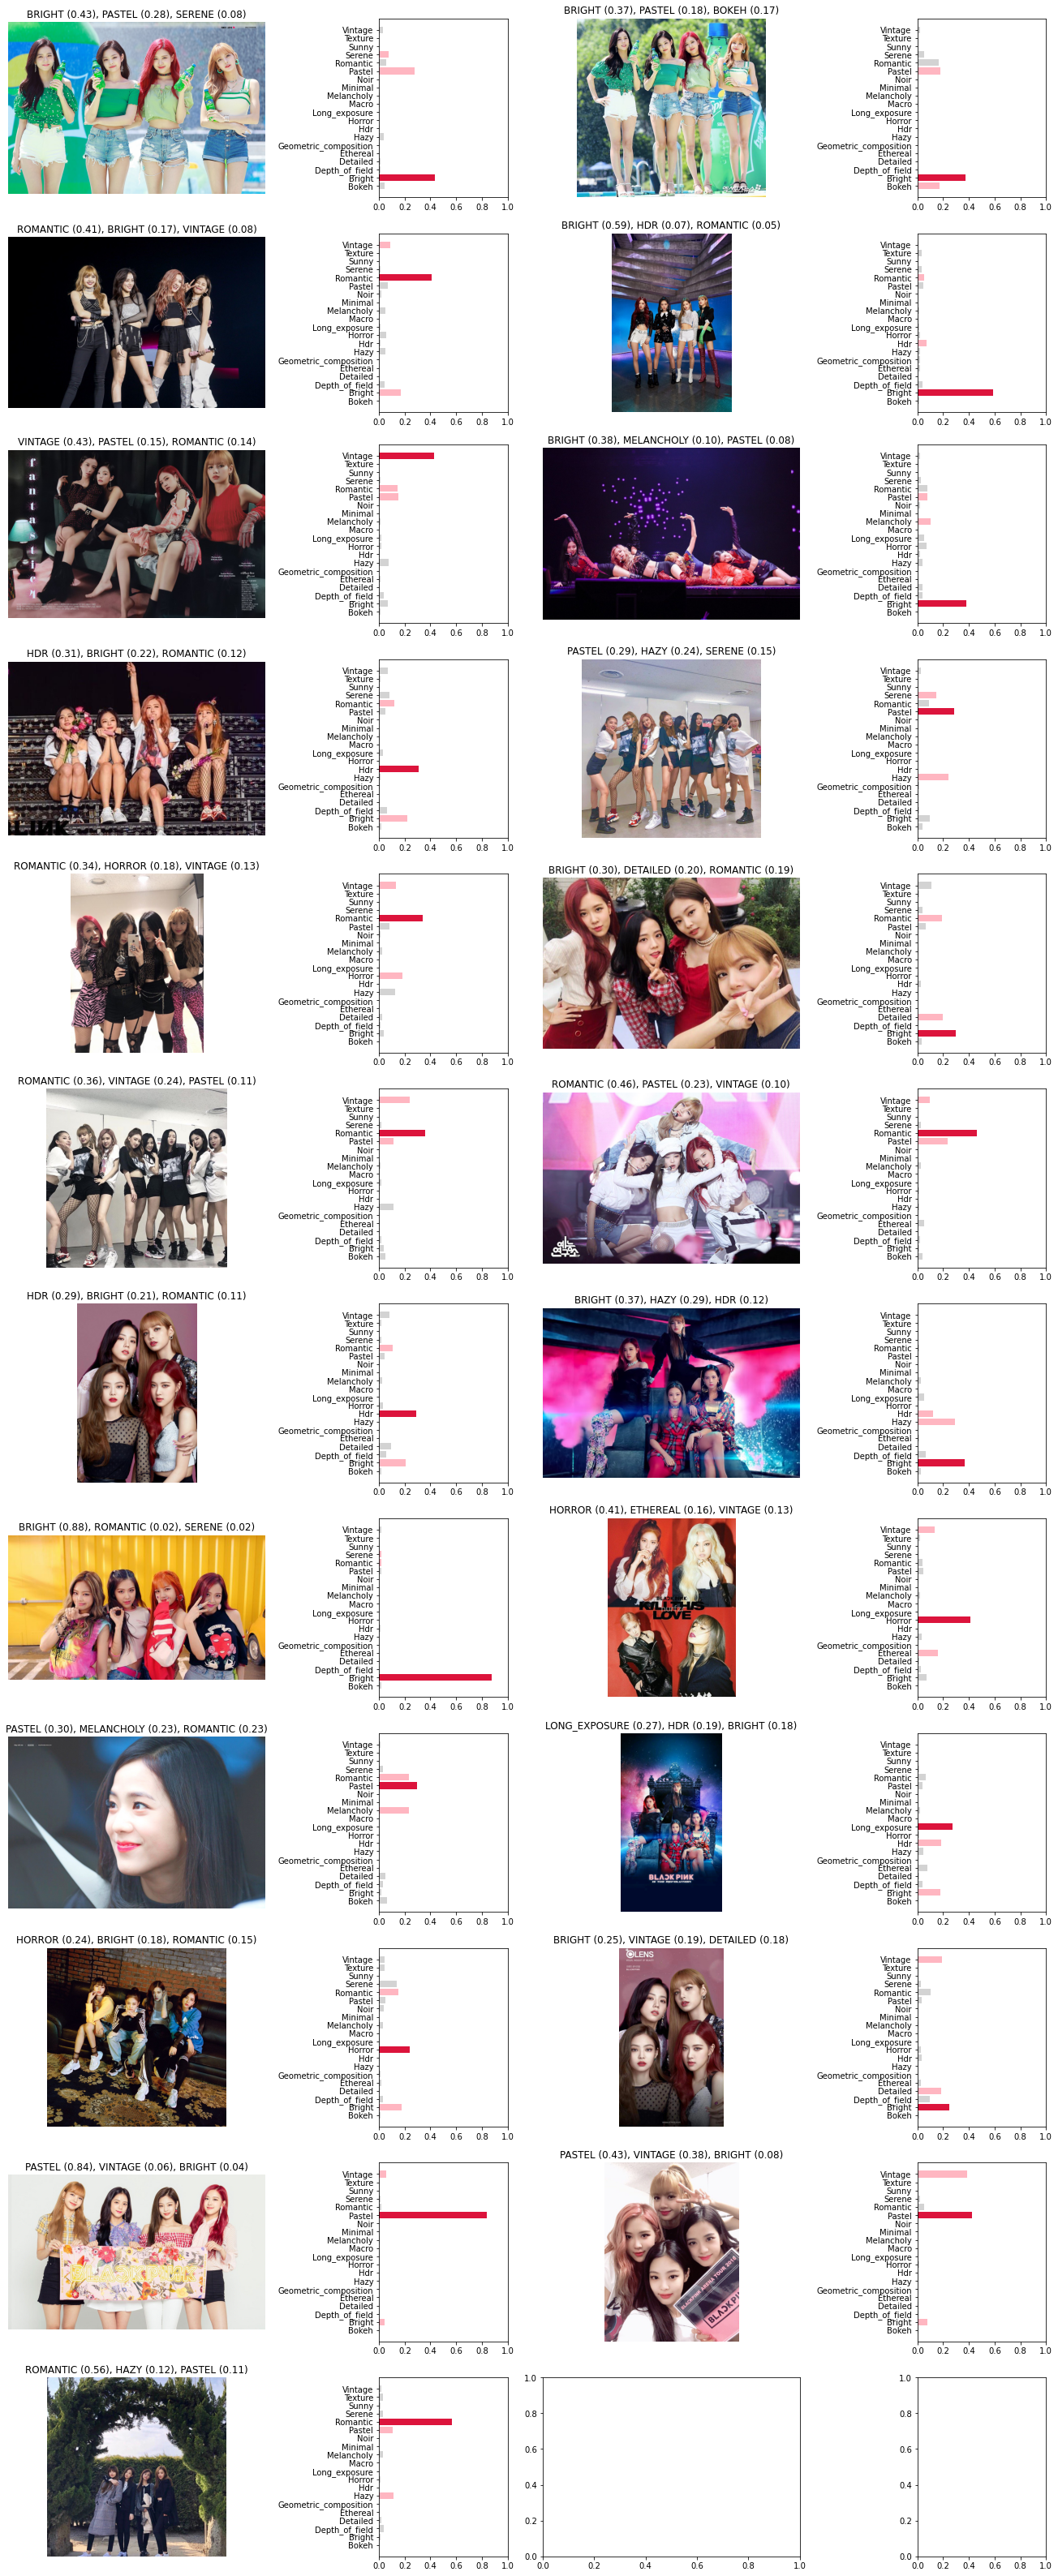

filename     Bokeh    Bright  ...     Sunny   Texture   Vintage
0    blackpink_1.jpg  0.044355  0.433595  ...  0.000923  0.001865  0.028602
1    blackpink_2.jpg  0.169674  0.372457  ...  0.001223  0.001422  0.022710
2    blackpink_3.jpg  0.008637  0.171704  ...  0.000557  0.002383  0.084812
3    blackpink_4.jpg  0.011255  0.590094  ...  0.002123  0.032270  0.009509
4    blackpink_5.jpg  0.011123  0.069407  ...  0.000431  0.000958  0.428716
5    blackpink_6.jpg  0.005300  0.383356  ...  0.002729  0.010975  0.022281
6    blackpink_7.jpg  0.018973  0.220717  ...  0.002716  0.010811  0.067546
7    blackpink_8.jpg  0.040157  0.097838  ...  0.000490  0.004485  0.029538
8    blackpink_9.jpg  0.006406  0.035779  ...  0.001566  0.005323  0.128710
9   blackpink_10.jpg  0.030665  0.297953  ...  0.000957  0.012511  0.107233
10  blackpink_11.jpg  0.047224  0.038298  ...  0.001774  0.003321  0.238472
11  blackpink_12.jpg  0.036904  0.013501  ...  0.000074  0.001122  0.097381
12  blackpink_13.jpg  0.020735  0.209567  ...  0.000476  0.017789  0.082632
13  blackpink_14.jpg  0.025897  0.370043  ...  0.000398  0.004707  0.003800
14  blackpink_15.jpg  0.015655  0.879580  ...  0.000267  0.001577  0.015015
15  blackpink_16.jpg  0.005907  0.070182  ...  0.001065  0.018784  0.134384
16  blackpink_17.jpg  0.062858  0.015866  ...  0.001661  0.005942  0.013589
17  blackpink_18.jpg  0.006979  0.176364  ...  0.002150  0.005974  0.003618
18  blackpink_19.jpg  0.012653  0.177517  ...  0.002498  0.040704  0.044157
19  blackpink_20.jpg  0.012328  0.249544  ...  0.000128  0.006505  0.191082
20  blackpink_21.jpg  0.007155  0.044634  ...  0.000141  0.000215  0.057866
21  blackpink_22.jpg  0.007065  0.079156  ...  0.000265  0.000378  0.384261
22  blackpink_23.jpg  0.001727  0.012389  ...  0.009851  0.031997  0.015706

[23 rows x 21 columns]